# CS 4464/7643 Deep Learning HW 1

### Setup - Google Colab

Edit and run the cell below to setup the environment for Google Colab (and only for Google Colab).

In [ ]:
#Cell 1
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Cell 2
%cd /content/drive/MyDrive/'PATH TO HW1 UNZIPPED FILES'/hw1/student_version/data
!sh get_data.sh
%cd ..

### Setup - Local Environment (Mac)

Run the cell below **once** if using the suggested local environment (and only the local environment - Mac).

Then, change the ipykernel in the top right of this VS Code window to `dl_hw1`.

In [ ]:
#Cell 1
%conda env create -f ./local_environment/environment.yaml

In [ ]:
#Cell 2
%cd /Users/siddharth/Documents/School/CS 4464/HW1/HW1Code-Spring2023/student_version/data 
!sh get_data.sh
%cd ..

### Setup - Local Environment (Windows)

Run the cell below **once** if using the suggested local environment (and only the local environment - Windows).

Then, change the ipykernel in the top right of this VS Code window to `dl_hw1`.

In [ ]:
#Cell 1
%conda env create -f ./local_environment/environment.yaml

In [1]:
#Cell 2

! get_data.bat
%cd ..

/Users/siddharth/Documents/School/CS 4464/HW1/HW1Code-Spring2023/student_version/data
/bin/bash: get_data.bat: command not found
/Users/siddharth/Documents/School/CS 4464/HW1/HW1Code-Spring2023/student_version


### All the following are for both Google Colab and the suggested local environment. 

In [58]:
# Cell 3
# Run all local tests in this block
# If you get an error saying test not found, add an __init__.py file in the
# tests directory


!python -m unittest tests.test_activation
!python -m unittest tests.test_loading
!python -m unittest tests.test_loss
!python -m unittest tests.test_network
!python -m unittest tests.test_training

.....
----------------------------------------------------------------------
Ran 5 tests in 0.006s

OK
Loading training data...
Training data loaded with 60000 images
.Loading training data...
Training data loaded with 60000 images
.
----------------------------------------------------------------------
Ran 2 tests in 11.809s

OK
..
----------------------------------------------------------------------
Ran 2 tests in 0.000s

OK
..
----------------------------------------------------------------------
Ran 2 tests in 0.029s

OK
Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
...Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
.
----------------------------------------------------------------------
Ran 4 tests in 32.636s

OK


In [2]:
#Cell 4
import yaml
import copy

from models import TwoLayerNet, SoftmaxRegression
from optimizer import SGD
from utils import load_mnist_trainval, load_mnist_test, generate_batched_data, train, evaluate, plot_curves

In [3]:
# Cell 5
%matplotlib inline
def train_model(yaml_config_file):
  args = {}
  with open(yaml_config_file) as f:
      config = yaml.full_load(f)

  for key in config:
      for k, v in config[key].items():
          args[k] = v
  
  # Prepare MNIST data
  train_data, train_label, val_data, val_label = load_mnist_trainval()
  test_data, test_label = load_mnist_test()

  # Prepare model and optimizer
  if args["type"] == 'SoftmaxRegression':
      model = SoftmaxRegression()
  elif args["type"] == 'TwoLayerNet':
      model = TwoLayerNet(hidden_size=args["hidden_size"])
  optimizer = SGD(learning_rate=args["learning_rate"], reg=args["reg"])
  
  # Training Code
  train_loss_history = []
  train_acc_history = []
  valid_loss_history = []
  valid_acc_history = []
  best_acc = 0.0
  best_model = None
  for epoch in range(args["epochs"]):
      batched_train_data, batched_train_label = generate_batched_data(train_data, train_label, batch_size=args["batch_size"], shuffle=True)
      epoch_loss, epoch_acc = train(epoch, batched_train_data, batched_train_label, model, optimizer, args["debug"])

      train_loss_history.append(epoch_loss)
      train_acc_history.append(epoch_acc)
      # evaluate on test data
      batched_test_data, batched_test_label = generate_batched_data(val_data, val_label, batch_size=args["batch_size"])
      valid_loss, valid_acc = evaluate(batched_test_data, batched_test_label, model, args["debug"])
      if args["debug"]:
          print("* Validation Accuracy: {accuracy:.4f}".format(accuracy=valid_acc))

      valid_loss_history.append(valid_loss)
      valid_acc_history.append(valid_acc)

      if valid_acc > best_acc:
          best_acc = valid_acc
          best_model = copy.deepcopy(model)
  
  #Testing Code
  batched_test_data, batched_test_label = generate_batched_data(test_data, test_label, batch_size=args["batch_size"])
  _, test_acc = evaluate(batched_test_data, batched_test_label, best_model) # test the best model
  if args["debug"]:
      print("Final Accuracy on Test Data: {accuracy:.4f}".format(accuracy=test_acc))
  
  return train_loss_history, train_acc_history, valid_loss_history, valid_acc_history

In [ ]:
# Cell 6
# train softmax model
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_softmax.yaml")

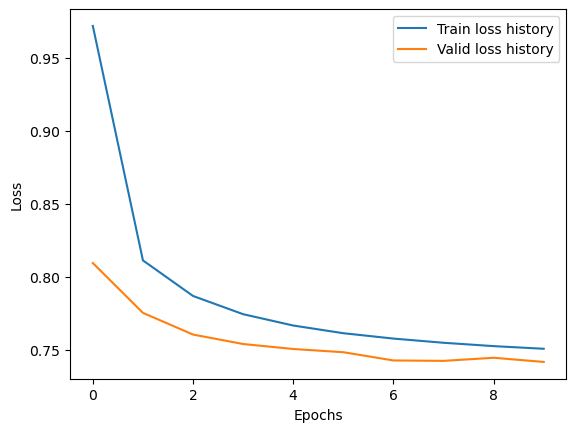

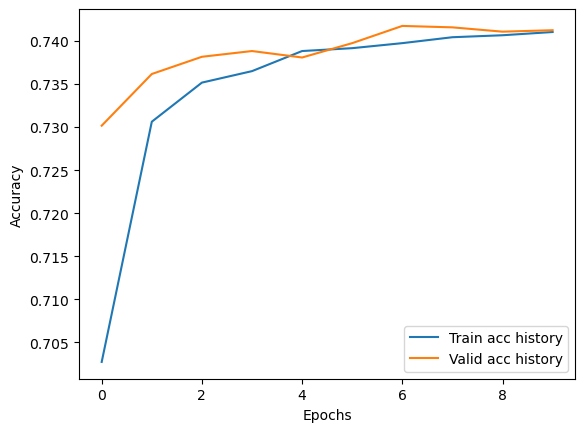

In [17]:
# Cell 7
# plot results for softmax model
import importlib
import utils

importlib.reload(utils)
from utils import plot_curves
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 8
# train two layer neural network
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_twolayer.yaml")

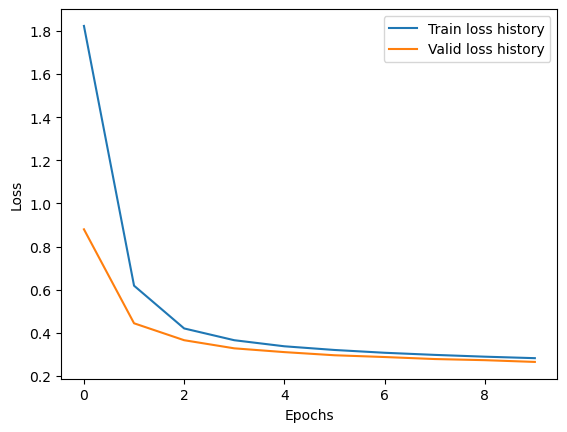

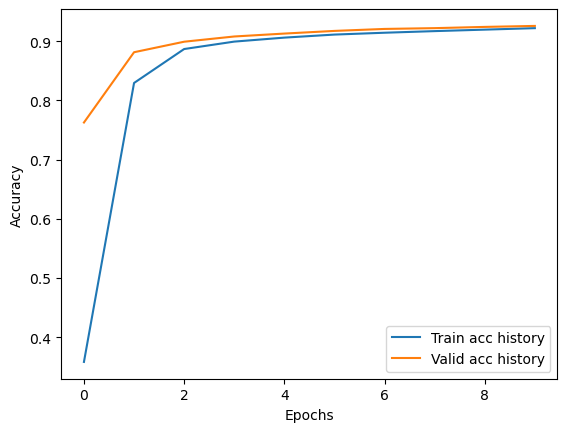

In [19]:
# Cell 9
# plot two layer neural network
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

# **Assignment 1 Writeup**

- Name: Siddharth Pillai
- GT Email: spillai42@gatech.edu
- GT ID: 903597179



## Two Layer Neural Network

# Learning Rates

- Tune the Two Layer Neural Network with various learning rates (while keeping all other hyperparameters constant) by changing the config file.
  - lr = 1
  - lr = 1e-1
  - lr = 1e-2
  - lr = 5e-2


In [ ]:
# Cell 10
# Change lr to 1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

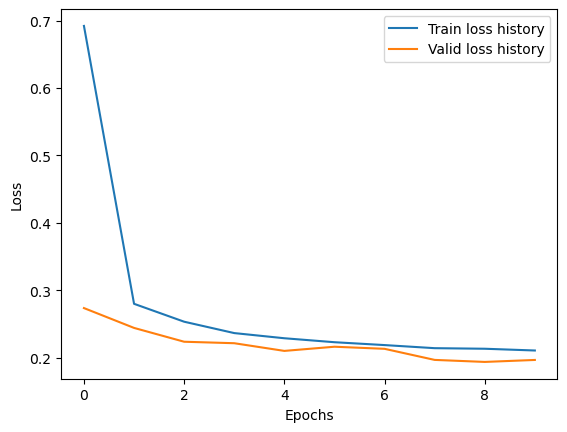

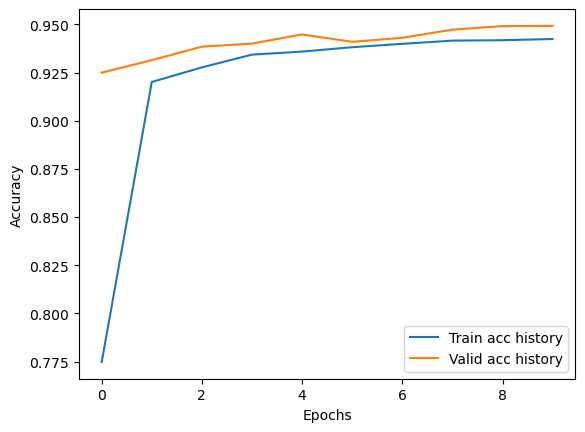

In [30]:
# Cell 11
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 12
# Change lr to 1e-1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

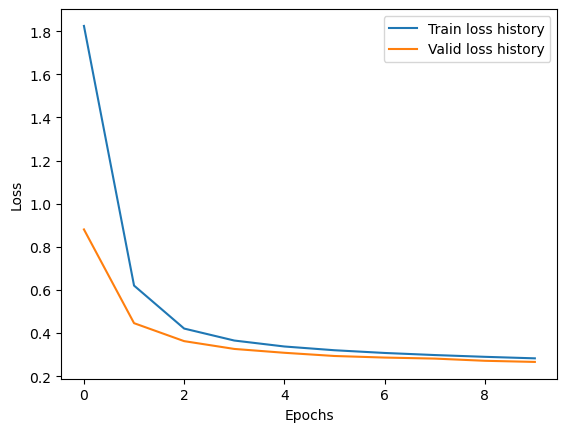

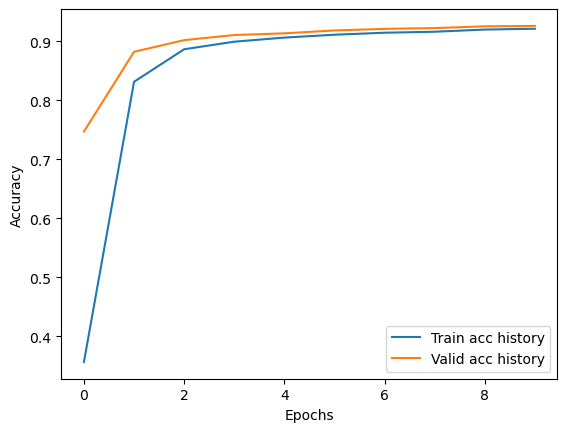

In [33]:
# Cell 13
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 14
# Change lr to 1e-2 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

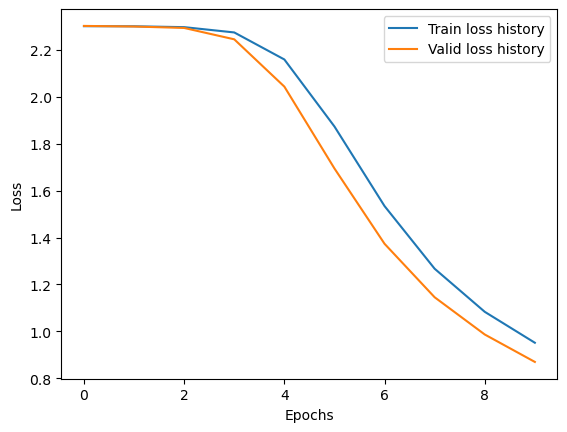

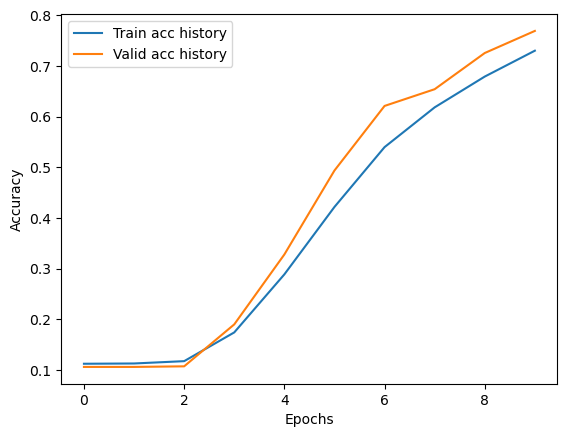

In [36]:
# Cell 15
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 16
# Change lr to 5e-2 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")


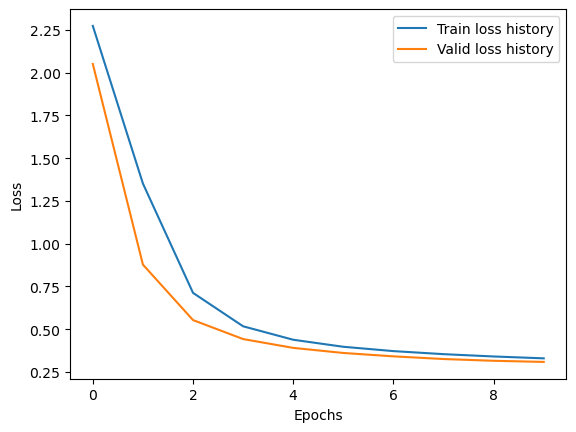

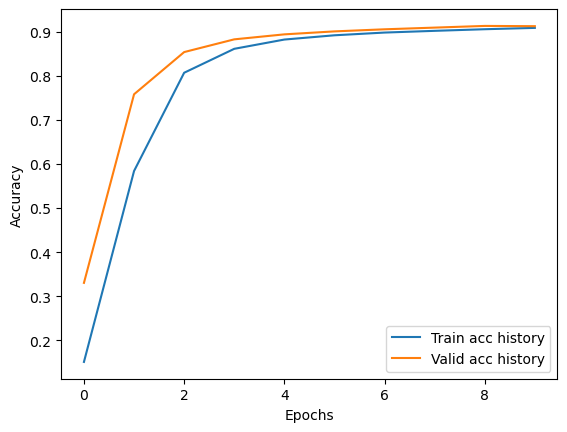

In [38]:
# Cell 17
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

Describe and explain your findings here:

LR = 1 : The model quickly approaches a local minima but loss and accuracy on validation set never converge due to the optimizers insensitivity to small changes (since LR is high).

LR = 0.1 : The model takes more epochs to approach the local minima, but training loss and accuracy decrease synchronously with validation loss and accuracy, and validation loss appears to converge. 

LR = 0.01 : The model is much slower, and the training and validation loss do not converge within the given number of epochs. 

LR = 0.05 : The validation loss reaches the lowest value observed during this test, and appears to converge.

Explaination: 

Selecting an appropriate learning rate is important and can be a sensitive process: If the LR is too low, the model will take too long to optimize the parameters and the loss will not converge due to too small a step size. On the other hand, selecting a very high learning rate will speed up gradient descent, but when it comes to finding a local optimum, the model will struggle because of the high step size oscillating over the local optimum. 

# Regularization

- Tune the Two Layer Neural Network with various regularization coefficients (while keeping all other hyperparameters constant) by changing the config file.
  
  - reg = 1e-1
  - reg = 1e-2
  - reg = 1e-3
  - reg = 1e-4
  - reg = 1


In [ ]:
# Cell 18
# Change reg to 1e-1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

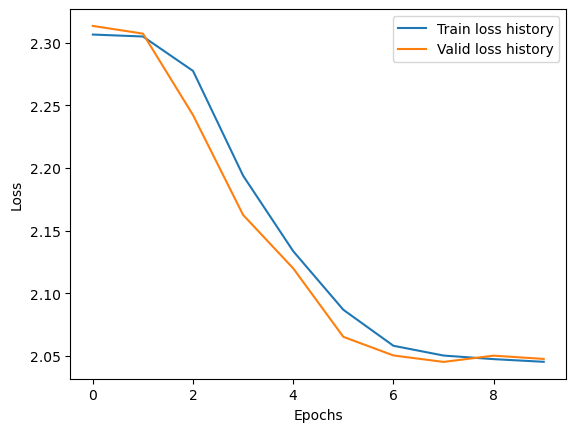

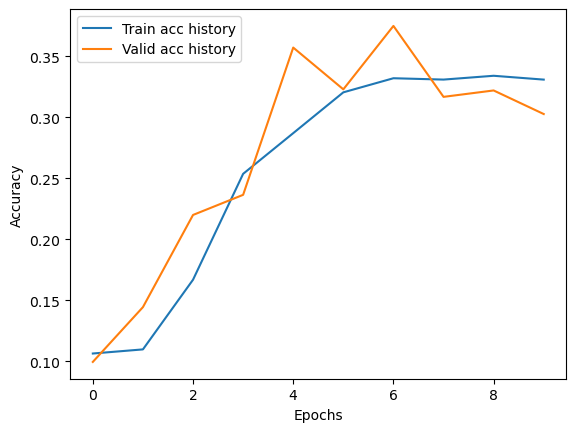

In [42]:
# Cell 19
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 20
# Change reg to 1e-2 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

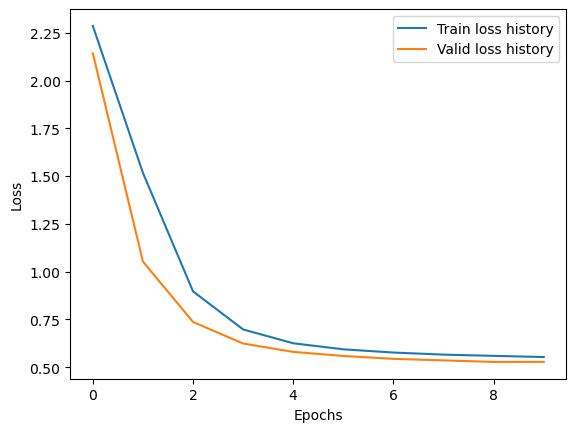

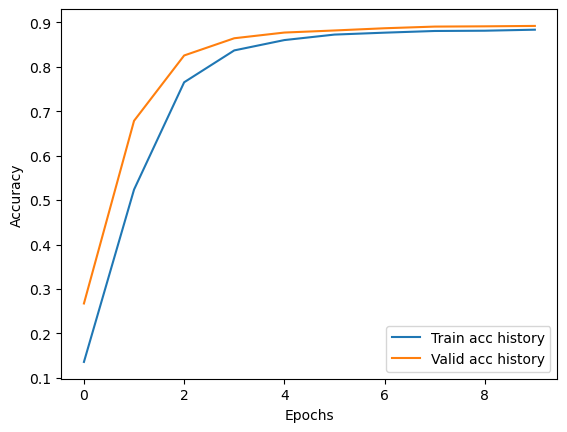

In [44]:
# Cell 21
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 22
# Change reg to 1e-3 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

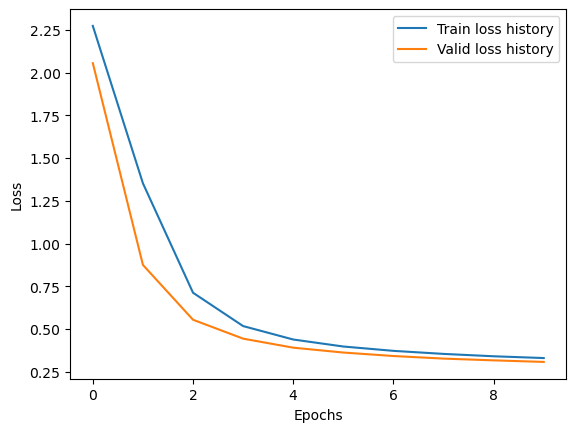

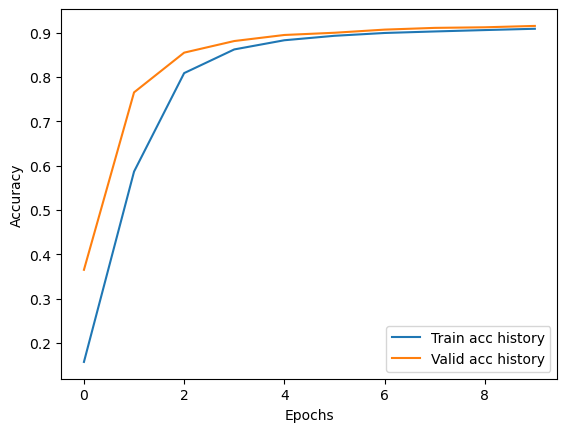

In [46]:
# Cell 23
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 24
# Change reg to 1e-4 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

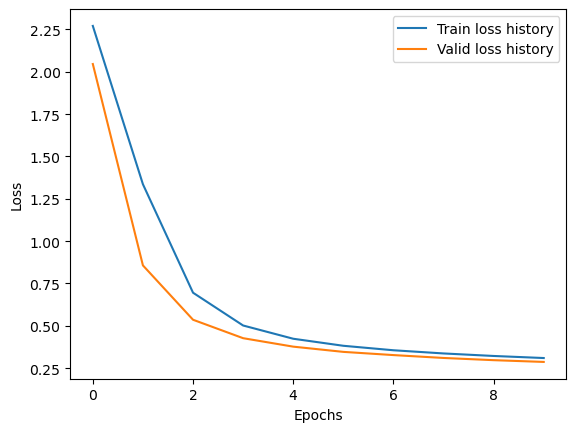

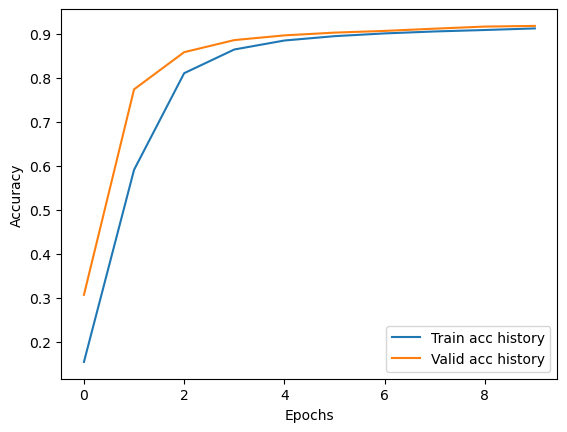

In [48]:
# Cell 25
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 26
# Change reg to 1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

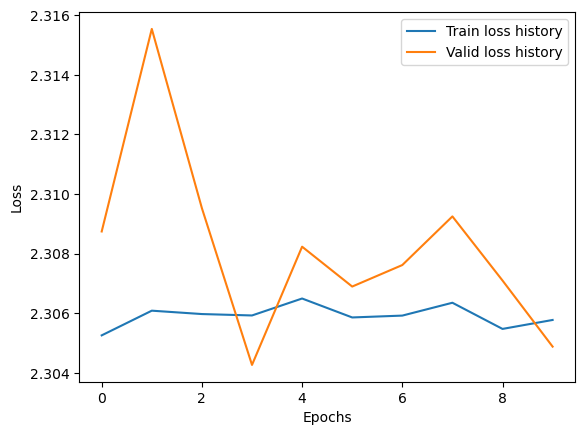

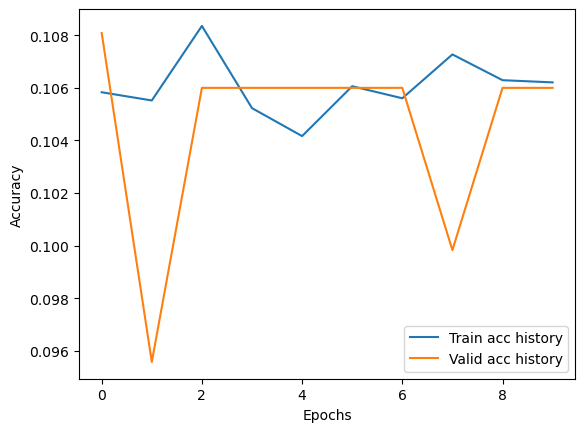

In [50]:
# Cell 27
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

Describe and explain your findings here:

RC = 1 : Model underfits the data. Validation loss and accuracy do not seem to converge. 

RC = 0.1 : Model underfits the data. Validation loss and accuracy converge to a sub-optimal values. 

RC = 1e-2 : Model performs well but worse than on lower values of RC. 

RC = 1e-3, 1e-4 : Validation loss and accuracy are lowest observed. 

As the regularization co-efficient increases, the model is enouraged to decrease its parameters more. Decreasing the parameters too much results in an underfit model, as in the cases where RC = 0.1 or 1. When RC is very low, the model can have higher valued parameters, and runs the risk of overfitting the data, which may have been the case when RC = 1e-3 or 1e-4. 


## Hyper-parameter Tuning

You are now free to tune any hyperparameters for better accuracy. In this block type the configuration of your best model and provide a brief explanation of why it works.

Train:
  batch_size: 64
  learning_rate: 0.04
  reg: 0.0001
  epochs: 15
  momentum: 0.9
  debug: True

The learning rate is ensures that the model can take sufficiently small steps so as to avoid oscillating between a local minimum. Due to this small step size, the number of epochs was increased from 10 to 15, as validation loss does not fully converge within 10 epochs. The regularization co-efficient allows sufficiently large weights, but given a test accuracy of 0.928, the model is not being overfit to the training set.

In [ ]:
# Cell 28
# hyperparameter tuning
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

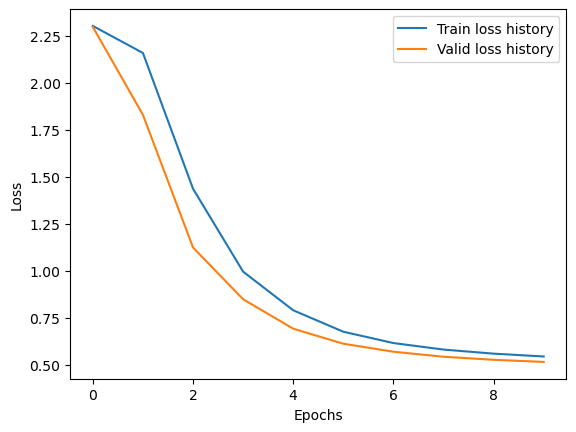

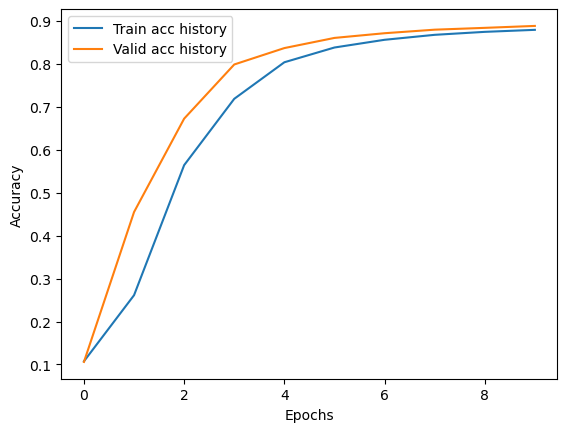

In [54]:
# Cell 29
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 30
#To collect submission
!sh collect_submission.sh

# For Windows
# ! collect_submission.bat